Pair Programming Intro Machine Learning - Regresión Lineal (RL) I

 - Objetivos:

1. Buscar un conjunto de datos a analizar:
    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/mnt/d/Adalab/ejercicios-de-adalab/modulo-3/files/Wellbeing_and_lifestyle_data_Kaggle.csv', index_col = 0)

In [3]:
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,,,,,,,,,
7/7/15,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
7/7/15,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6


In [6]:
print(df.shape)
print(df.columns)

(15972, 23)
Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15972 entries, 7/7/15 to 3/14/21 9:03
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  object 
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION  

In [15]:
df.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15972.0,5.232970,3.311912,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15972.0,5.616454,3.242021,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15972.0,4.000751,2.755837,0.0,2.0,3.0,6.0,10.0
DONATION,15972.0,2.715314,1.851586,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0
FLOW,15972.0,3.194778,2.357518,0.0,1.0,3.0,5.0,10.0


In [14]:
df.describe(include ='object').T

,count,unique,top,freq
DAILY_STRESS,15972,7,3,4398
AGE,15972,4,21 to 35,6108
GENDER,15972,2,Female,9858


In [9]:
df.duplicated().sum()

683

In [8]:
# NO HAY NULOS
# HAY 683 DUPLICADOS, LOS BORRAMOS.
# LA VAR. RESOUESTA ES 'WORK_LIFE_BALANCE_SCORE' , BORRAREMOS ALGUNAS COLUMNAS QUE NO NOS INTERESAN Y CREAREMOS UNA NUEVA COLUMNA DE CATEGORIAS DEL SCORE.
# TIPOS DE VAR.: ALGUNAS VARIABLES SON TIPO INT64 PERO SON CATEGORICAS EN SUAS VALORES, LAS CAMBIAREMOS.
# TRABAJAREMOS SOBRE UNA COPIA DEL DF 


In [5]:
df1 = df.copy()

In [6]:
df1.drop_duplicates(inplace = True)


In [7]:
df1.duplicated().sum()

0

Drop columnas : nos quedaremos con las variables relacionadas con aspectos físicos y relacionales(?).


In [8]:
# elegimos las columnas a eliminar 
df1.drop(['PLACES_VISITED', 'SUPPORTING_OTHERS', 'ACHIEVEMENT', 'DONATION', 'TODO_COMPLETED', 'FLOW', 'LIVE_VISION', 'LOST_VACATION', 'DAILY_SHOUTING', 'PERSONAL_AWARDS'], axis = 'columns', inplace = True)

In [ ]:
df1.columns

Type : hay  columnas type int64 cuando sus valores son clasificaciones (tienen un nº finito de posibilidades = 'category'), las cambiamos

In [ ]:
df1['DAILY_STRESS'].value_counts()

In [ ]:
df1[''].astype('category')

Rename columns : renombramos columnas añadiendo métrica 

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [ ]:
df1.rename(columns : ['FRUITS_VEGGIES' : 'FRUITS_U/D', 'DAILY_STRESS' : ', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE''])

 0   ok FRUITS_VEGGIES           nº fruta por dia 
 1   ok DAILY_STRESS             nível diário estrés 
 2   nok PLACES_VISITED           nº lugares visitados
 3   ok CORE_CIRCLE              nº de personas cercanas  
 4   nok SUPPORTING_OTHERS        nº personas que ayuda
 5   ok SOCIAL_NETWORK           nº interacciones por dia en rrss 
 6   nok ACHIEVEMENT              nº logros con orgullo  
 7   nok DONATION                 nº donaciones (veces que donas) 
 8   ok BMI_RANGE                masa corporal  índice 
 9   nok TODO_COMPLETED           completar lista tareas diarias  
 10  nok FLOW                            -
 11  ok DAILY_STEPS              nº pasos diarios (1000)
 12  nok LIVE_VISION                    -   
 13  ok SLEEP_HOURS              horas sueno por dia  
 14  nok LOST_VACATION                  -
 15  nok DAILY_SHOUTING           nº veces   
 16  ok SUFFICIENT_INCOME       salario   
 17  nok PERSONAL_AWARDS                -
 18  ok TIME_FOR_PASSION         horas/dia  
 19  ok WEEKLY_MEDITATION        nº veces/semana  
 20  ok AGE
 21  ok GENDER                   15972 non-null  object 
 22  ok WORK_LIFE_BALANCE_SCORE  15972 non-null  float64

Outliers

In [10]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,,,,,,,,
7/7/15,3,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,609.5
7/7/15,2,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,655.6


IndexError: index 14 is out of bounds for axis 0 with size 14

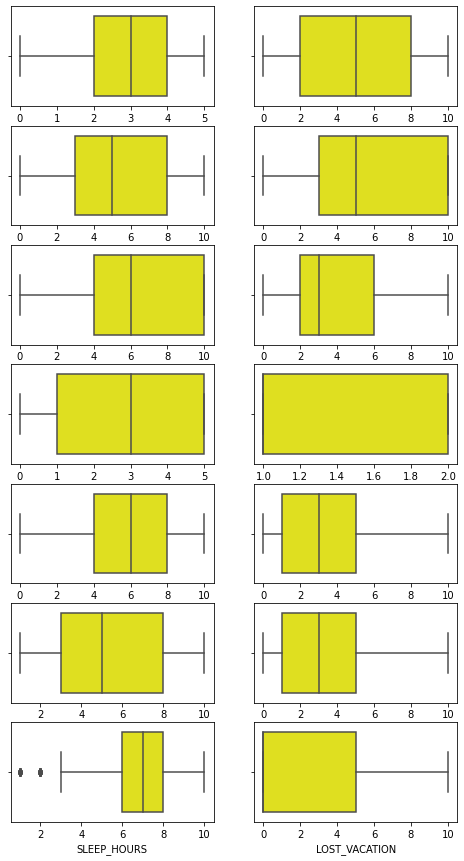

In [11]:
fig, axes = plt.subplots(7, 2, figsize=(8,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df1, ax=axes[indice], color = "yellow"); # para trazar una línea de densidad
  
plt.tight_layout()
fig.delaxes(axes[-1]);

---> tenemos outliers en la var. 'SLEEP_HOURS', los identificamos.

In [15]:
# calculamos cuartiles
Q1 = np.nanpercentile(df['SLEEP_HOURS'], 25)
Q1


6.0

In [16]:
Q3 = np.nanpercentile(df['SLEEP_HOURS'], 75)
Q3

8.0

In [17]:
# calculamos rango intercuartil
IQR = Q3 - Q1
IQR

2.0

In [18]:
# calculamos límites
outlier_step = 1.5 * IQR
outlier_step

3.0